# BOM_study_sites_rainfall

This notebook uses gridded daily BoM data to calculate a rainfall climatology for each of the case study sites. A csv of mean daily rainfall for each month and accompanying histogram for each site is produced.

** Code dependencies **
- csv file with the lat/lon coordinates of the case study bounding box/es 

Created by Claire Krause. January 2017. Datacube version 1.1.13, Python v3.

In [1]:
# Import the librarys we need for our analysis
%matplotlib inline
import datacube
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import scipy.stats
import pandas
import csv
import logging
logging.getLogger('datacube.storage.storage').setLevel(logging.ERROR)

dc = datacube.Datacube(app='dc-BOMrainfallclimate')

In [2]:
def write_to_csv(OUTPUT_path, row):
    if num == 0:
        with open(OUTPUT_path,'w') as csvFile:
            writer = csv.writer(csvFile)
            header = ['name','dry','wet']
            writer.writerow(header)
            writer.writerow(row)
    else:
        with open(OUTPUT_path,'a') as csvFile:
           writer = csv.writer(csvFile)
           writer.writerow(row)

## Import the list of case study sites and bounding boxes.¶

In [3]:
# Read in a csv file with all case study bounding boxes
names = pandas.read_csv('/g/data/p25/cek156/case_study_sites.csv', delimiter = ',')
print(names)
x = len(names.index)
iterable = list(range(0,x))

         Name  minlat  maxlat  minlon  maxlon
0  Blackwood2  -34.10  -32.70  116.40  118.40
1     Garford  -29.90  -29.23  133.15  134.70
2    Mandora1  -21.10  -18.87  120.90  127.00
3    Mandora2  -20.03  -18.88  120.90  123.30
4   Murchison  -27.95  -25.49  114.75  119.30
5         Ord  -15.93  -15.05  128.30  129.29
6      TiTree  -23.04  -21.67  133.18  134.24
7    Daintree  -16.39  -16.09  145.21  145.42
8       Laura  -15.85  -14.43  143.42  144.89
9  Blackwood1  -34.40  -33.58  115.00  116.40


Working on Blackwood2
writing to csv
Working on Garford
writing to csv
Working on Mandora1
writing to csv
Working on Mandora2
writing to csv
Working on Murchison
writing to csv
Working on Ord
writing to csv
Working on TiTree
writing to csv
Working on Daintree
writing to csv
Working on Laura
writing to csv
Working on Blackwood1
writing to csv


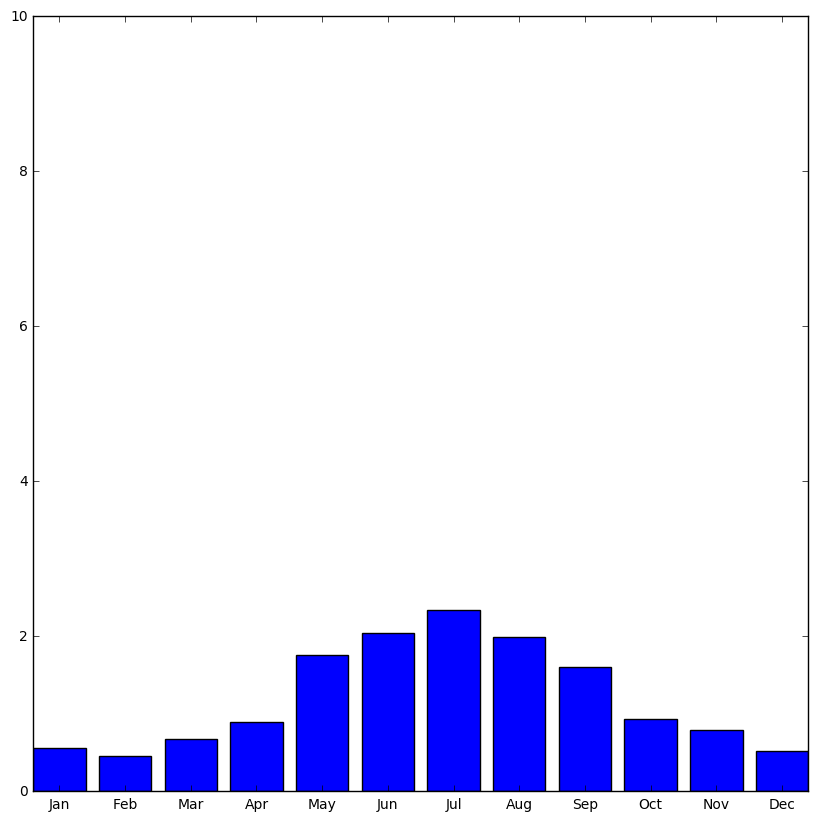

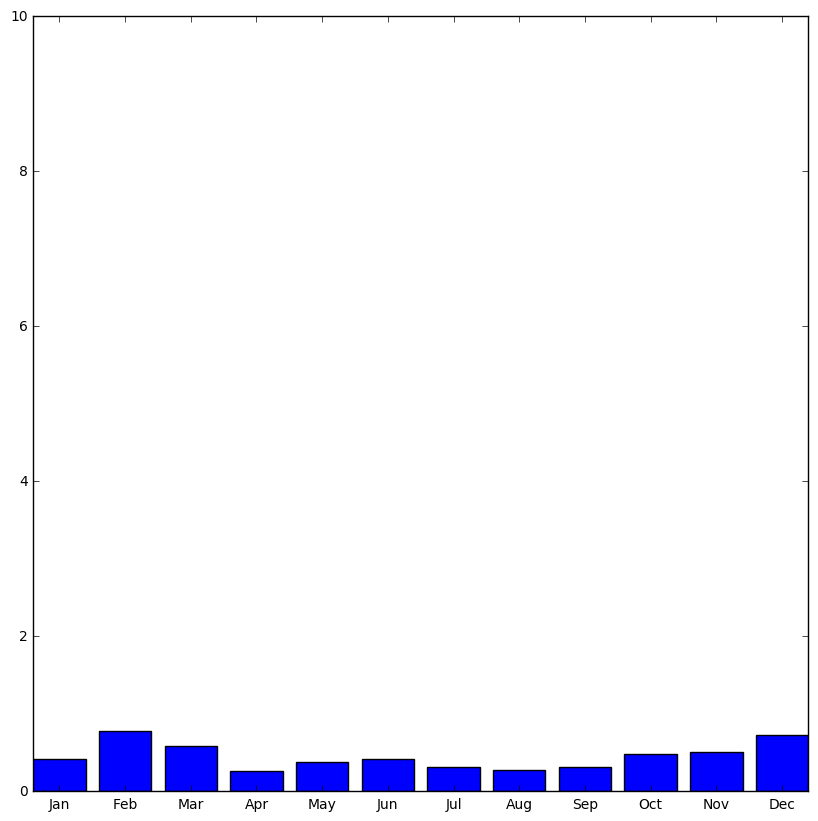

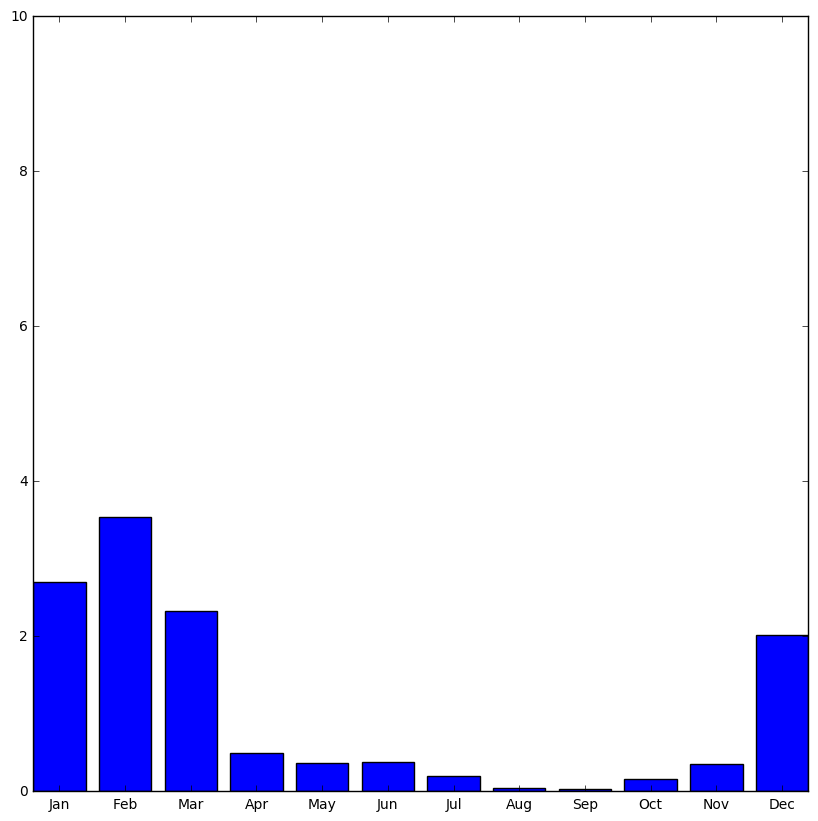

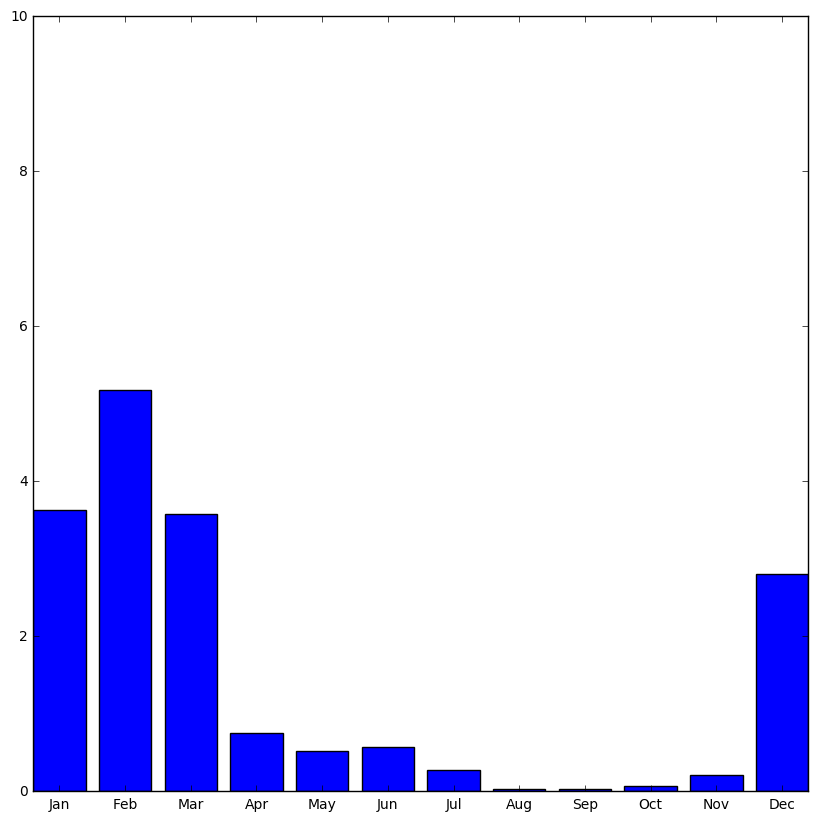

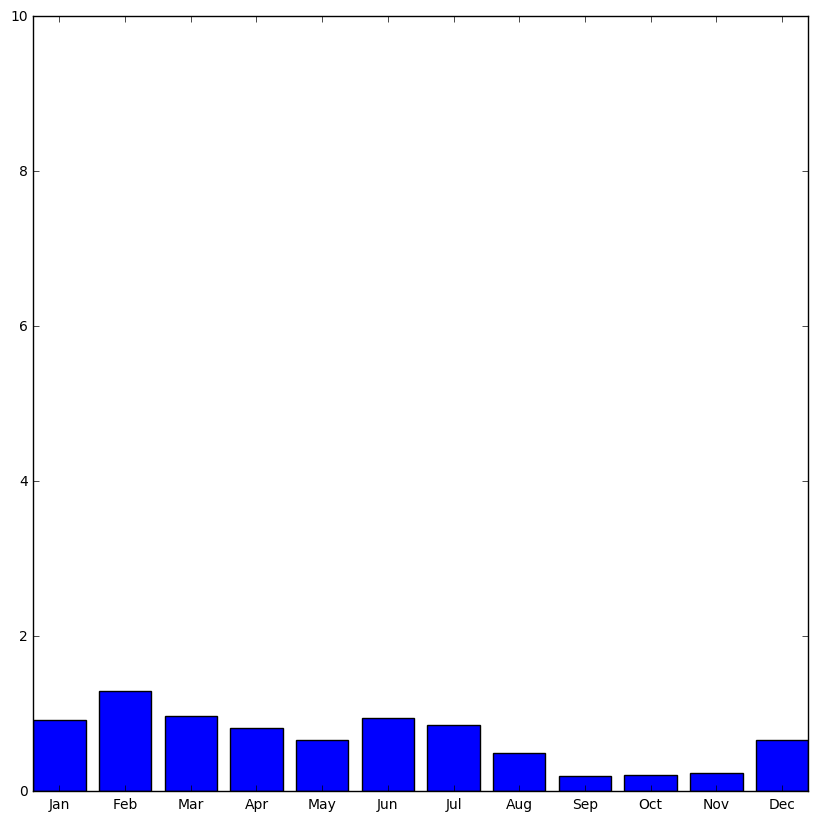

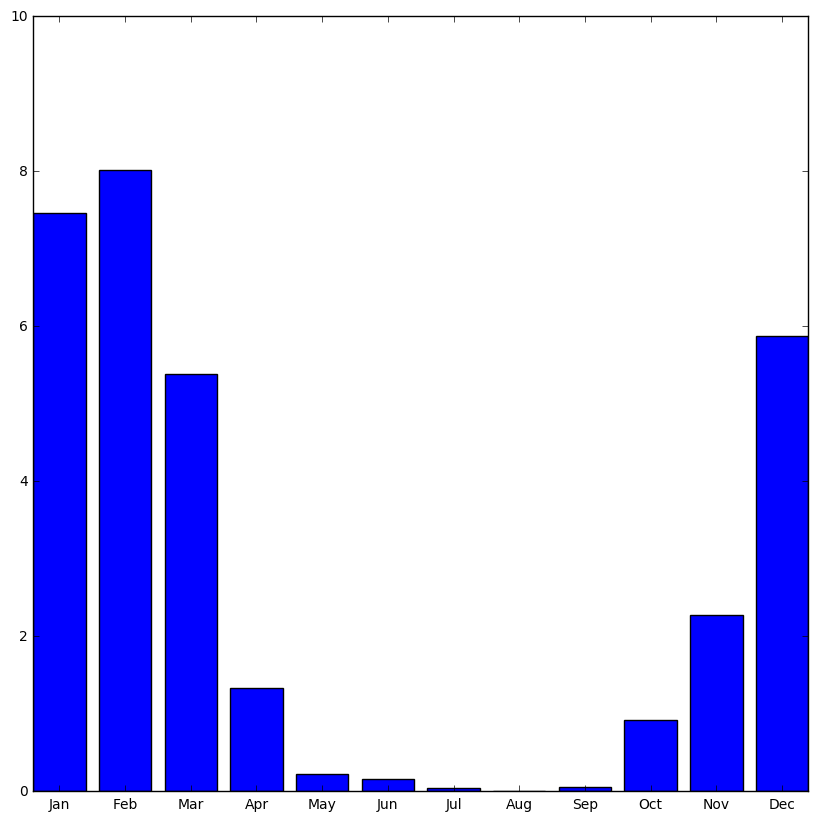

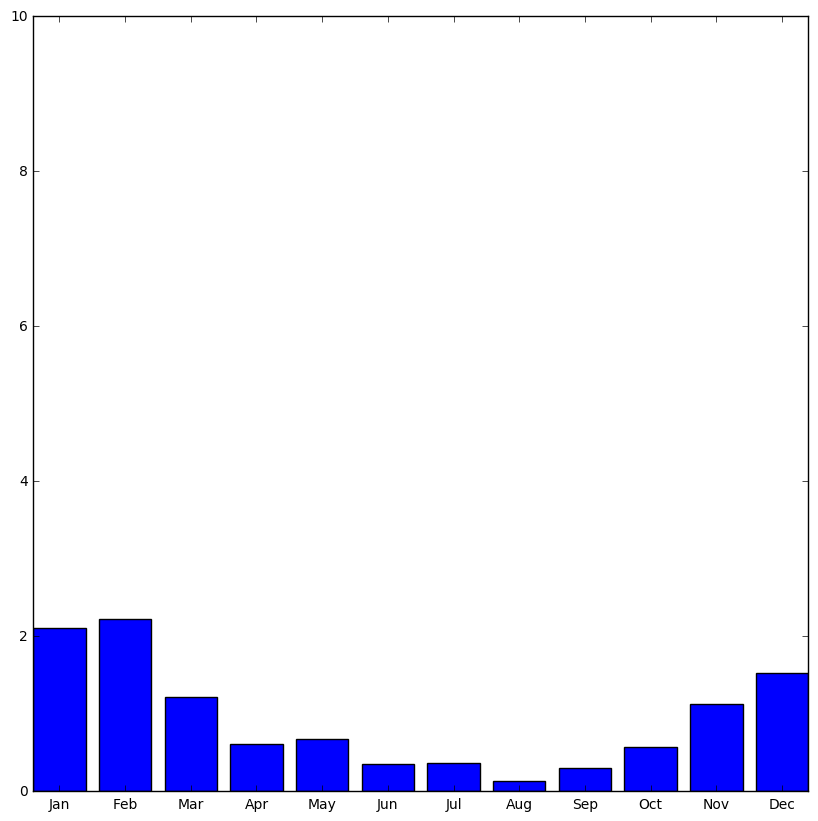

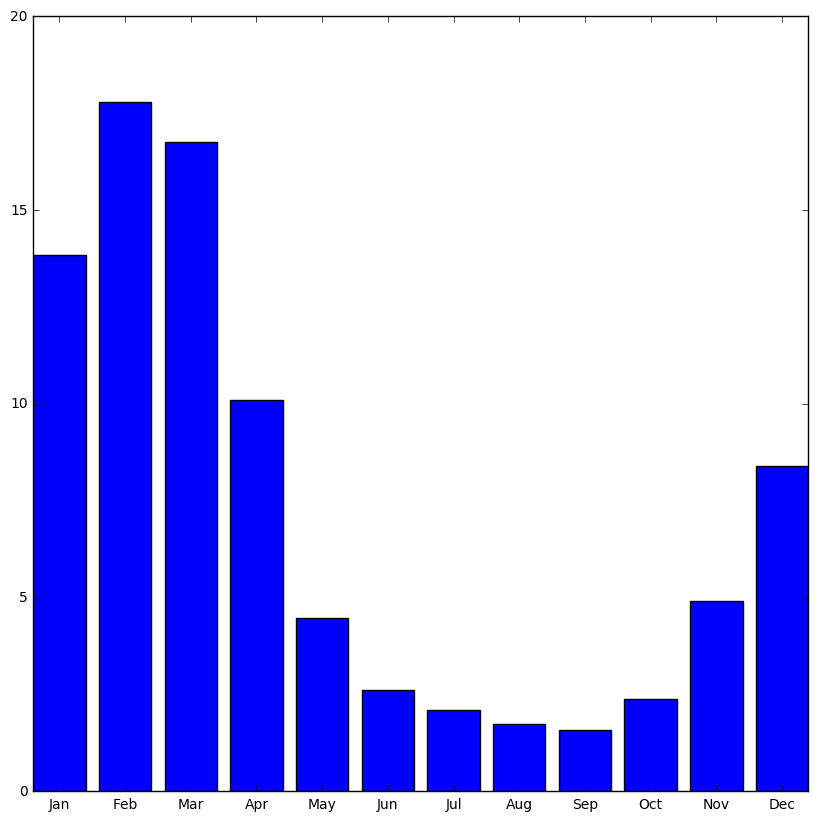

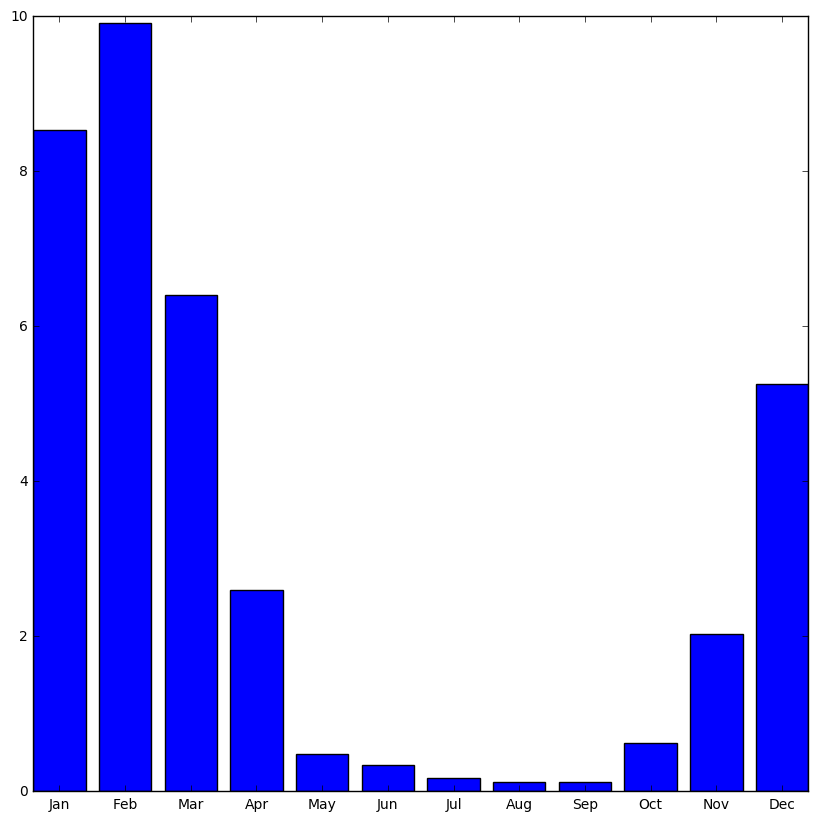

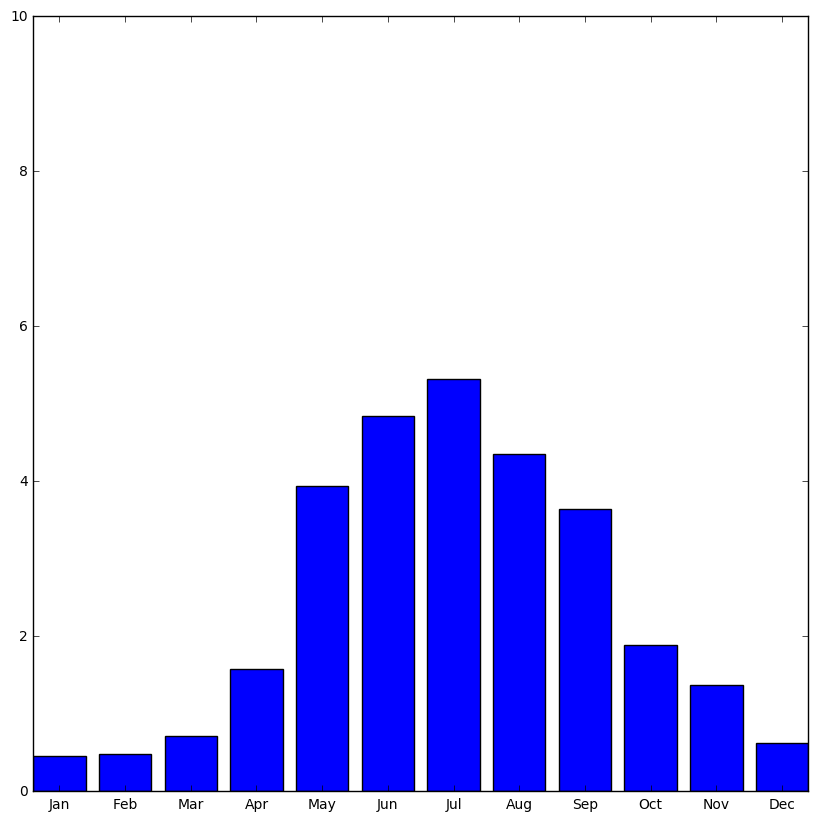

In [4]:
# Set up your loop so that it analyses each of the sites in the file.

OUTPUT_file = '/g/data/p25/cek156/BOM_site_rainfall_climate.csv'

for num in iterable:
    Studysite = names.ix[num]
    plt_name = '/g/data/p25/cek156/' + Studysite.Name + '_rainfall_monthly.jpg'
    print('Working on ' + Studysite.Name)

    # Now set up the query with the chosen study site
    query = {'lat': (names.maxlat[num], names.minlat[num]), 
             'lon': (names.minlon[num], names.maxlon[num]),
             'time': ('1986-01-01', '2016-12-31')}

    # Grab bom_rainfall_grids from the datacube
    Studysite_rain = dc.load(product = 'bom_rainfall_grids', **query)

    # Resample to monthly data, starting with December
    monthly_avg = Studysite_rain.groupby('time.month').mean()

    # Draw up a bar chart for this site showing the rainfall climatology

    fig, ax = plt.subplots(figsize=(10,10))
    width=0.8
    plt.bar(monthly_avg.month -1,monthly_avg.rainfall, width = width)

    # Setting the x-axis and y-axis limits
    #plt.xlim([-0.5, 12.2])
    plt.xlim([0, 11.8])
    if monthly_avg.rainfall.max() >= 10:
        plt.ylim([0, 20])
    else:
        plt.ylim([0, 10])

    # Set the y axis label
    #ax.set_ylabel('Rainfall (average mm/month)')
    #plt.title(Studysite.Name + ' monthly average rainfall 1986 - 2016')

    # Set the labels for the x ticks
    ax.set_xticks(np.arange(len(monthly_avg.month)) + width/2)
    ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun', 'Jul','Aug','Sep','Oct','Nov','Dec'])

    #Let's save the plot
    plt.savefig(plt_name, bbox_inches='tight')

    # Now add these into a new csv file for later
    row = [names.Name[num],monthly_avg.rainfall.values]
    # Write our stats to a csv file so we can compare them later
    # If this is the first site, make a new file, otherwise, append the existing file
    print('writing to csv')
    write_to_csv(OUTPUT_file, row)